# HandsOn 6 - Basic Data Visualization with matplotlib
Data visualization has a great role in data analysis. Data visualization gave us a clear insight of data and the information behined it. We could use data visualization to understand trends, outliers and some meaning and patterns in data.
To achive this goal, we could use matplotlib which is a library built on numpy arrays.

The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. Allright, without further ado let's get started!

## Import Modules/Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 💭 Load data from local disk

First, we need to load the data from local disk as a Pandas dataframe.
- Taxi csv, which is the dataset for taxi in `taxi.csv`

**Write the answer below:**  
(Hint: You can use `read_csv` method from Pandas library and save the dataframe in `df` variable)

In [7]:
import seaborn as sns

df = sns.load_dataset('taxis')

### 💭 Quick look at data

Now,  for better understanding of data display first 5 rows of dataframe.


In [8]:
# first 5 rows
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Most of the times when you want to analyse a data you need to define new 
parameters such as what we did below:

In [4]:
from datetime import datetime, timezone 
import pytz 
 
local_tz = pytz.timezone('Asia/Tehran') 
timestamps=[datetime.strptime(t, '%Y-%m-%d %H:%M:%S').replace(tzinfo=pytz.utc).astimezone(local_tz).timestamp() for t in df['pickup']] 
df['pickup_timestamp'] = timestamps
timestamps=[datetime.strptime(t, '%Y-%m-%d %H:%M:%S').replace(tzinfo=pytz.utc).astimezone(local_tz).timestamp() for t in df['dropoff']] 
df['dropoff_timestamp'] = timestamps

In [5]:
df['request_year'] = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S').year for t in df['pickup']]
df['request_month'] = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S').month for t in df['pickup']]
df['request_day'] = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S').day for t in df['pickup']]
df['request_hour'] = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S').hour for t in df['pickup']]

## 💭 Labels and titles

In the first step, you are going to learn how add labels and titles to your figures.

All of your following figures should have labels and titles.

*   y1 color to Cyan, label to "sin"
*   y2 color to Yellow, label to "-sin"
*   title to "sin and -sin from -2*pi to 2*pi"
*   xlabel to "degree"
*   ylabel to "y"

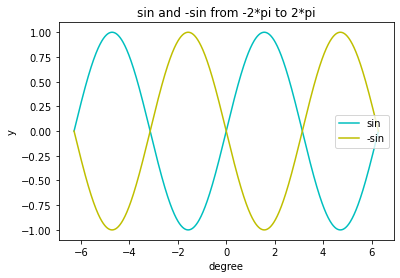

In [6]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-2*np.pi, 2*np.pi, 1000, endpoint=True)
y1 = np.sin(x)
y2 = -1*np.sin(x)
plt.plot(x, y1, color="c", label = "sin")
plt.plot(x, y2, color="y", label = "-sin")
plt.title("sin and -sin from -2*pi to 2*pi")
plt.xlabel("degree")
plt.ylabel("y")
plt.legend()
plt.show()

⭐ Now that you have learned how to set titles, axis labels, legends and etc, set appropriate ones for the following questions.

##  Visalization

In this section we want to visualize our data with  appropriate graphical display.


### Univariate visualization

Every time you see “uni”, it means one and by Univariate visualization we mean to visualize and analyze one feature of our dataset. Analyzing one feature mostly means to observe the distribution of the feature. To do so, every statistical type of features has its own means of visualizing its distribution.

#### Quantitative features

Numerical values, such as discrete values (integer) or continuous values (real numbers or float) are mostly referred as Quantitative features.

##### 💭 Histograms and density plots

One simple way of visualizing the distribution of a numerical value is to use a histogram. It first, divides the range of the value into parts named bins and counts how many of feature instances are in the range of that bin. The distribution of the feature or its skewness can be visualized using histograms.

- Plot a `hsitogram` for tip with an appropaite `bin` size.


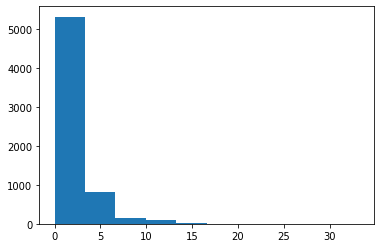

In [7]:
#histogram of a numerical variable
plt.hist(df.tip);

Now we want to compare `histogram of two groups`:

- First group: trips have 1 passenger

- Second group: trips have 6 passengers

Run below steps one by one:

- 1) Plot these two groups with plt.hist with 20 bins
- 2) what's the problem? As you can see the frequency of two groups are different
  and comparing them is impossible. By changing the `density` paramater of plt.hist to `True` we can compare two distributions. Why? What changed?

- 3) Now we can increase transparency of one of the groups by changing `alpha` parameter of plt.hist to `0.5`, so we can compare two histograms better.

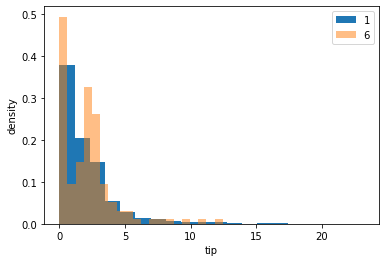

In [9]:
plt.hist(df[df['passengers'] == 1]['tip'], bins=20, density=True);
plt.hist(df[df['passengers'] == 6]['tip'], bins=20, density=True, alpha=0.5)
plt.xlabel('tip')
plt.ylabel('density')
plt.legend(['1', '6']);


*   Use DataFrame plot function to plot smoothed density of features.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

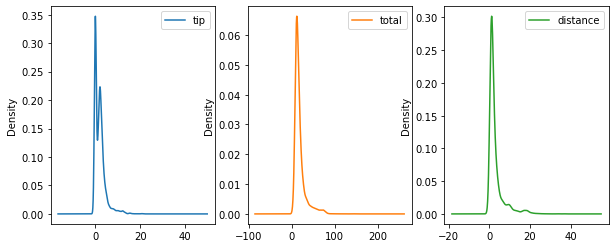

In [6]:
df[['tip', 'total', 'distance']].plot(kind = "density", subplots = True, layout = (1,3), sharex = False, figsize = (10,4))

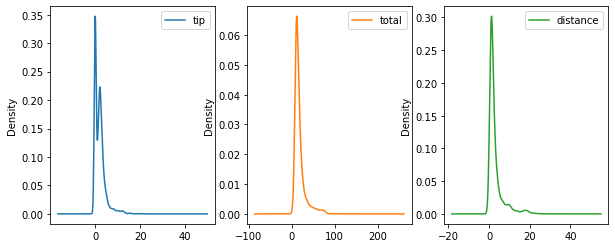

#### Categorical and binary features

Categorical features contain a set of certain values corresponding to a category. Binary variables are categorical variables with exactly 2 values in the set of possible values. An ordinal variable is a categorical variable in which variable are ordered, for example if you show people with age younger that 30 as category 1, people with age between 31 and 60 as category 2 and people older than 61 as category 3, it is called an ordinal variable.

##### 💭 Bar Plot

A bar chart describes the `comparisons between the discrete categories`. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.
- Plot a bar plot for `payment` category.
- Plot a horizontal bar plot for `color` category.


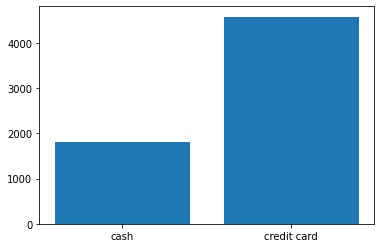

In [10]:
values = df.groupby('payment')['payment'].count().values
index = df.groupby('payment')['payment'].count().index
plt.bar(index,values);

<BarContainer object of 2 artists>

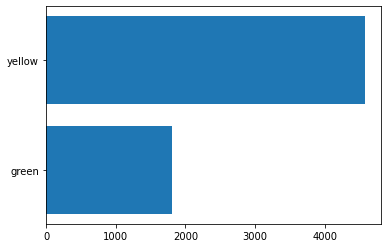

In [14]:
#horizontavalues = df.groupby('color')['color'].count().values
index = df.groupby('color')['color'].count().index
plt.barh(index,values)

##### 💭 Pie chart

Piechart are used to display univarient data, he pie is divided into different slices, with each slice representing the frequency of the processes in the dataset.

* Plot a piechart for pickup_borough

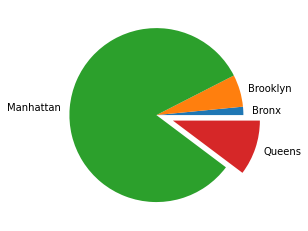

In [15]:
mylabels = df.groupby('pickup_borough')['pickup_borough'].count().index
y = df.groupby('pickup_borough')['pickup_borough'].count().values
myexplode = [0, 0, 0, 0.2]
plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

### Bonus: working with time series data

* seperate each 7 days between the min and max pickup date into a group (sine 31 is not diviedable by 7 the last group contains less days than 7)
* plot count of total for each group

In [16]:
mintime = min([datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in df['pickup']])
maxtime = max([datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in df['pickup']])

In [17]:
from datetime import date, timedelta
delta = maxtime - mintime
dates = []
for i in range(int((delta.days + 1)/7)):
    day = mintime + timedelta(days=i*7+7)
    dates.append(day)
dates.append(maxtime)
dates

[datetime.datetime(2019, 3, 7, 23, 29, 3),
 datetime.datetime(2019, 3, 14, 23, 29, 3),
 datetime.datetime(2019, 3, 21, 23, 29, 3),
 datetime.datetime(2019, 3, 28, 23, 29, 3),
 datetime.datetime(2019, 3, 31, 23, 43, 45)]

In [18]:
df['date'] = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in df['pickup']]
mask = (df['date'] > mintime) & (df['date'] <= dates[0])
sum_total = [df.loc[mask]['total'].sum()]

In [19]:
for i in range(len(dates)-1):
    mask = (df['date'] > dates[i]) & (df['date'] <= dates[i+1])
    sum_total.append(df.loc[mask]['total'].sum())

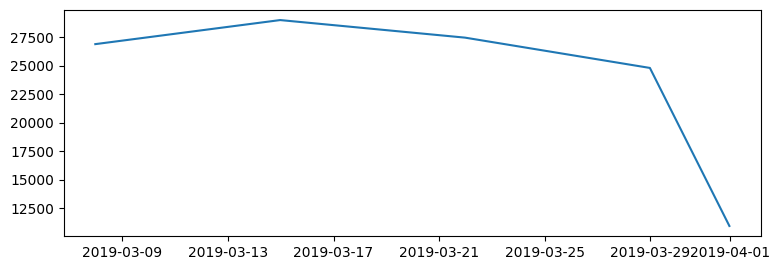

In [20]:
plt.figure(figsize=(9,3),dpi=100)
plt.plot(dates, sum_total)

### 💭 Bonus: Using Figure

A figure is an object that contains all the plot elements and it can contain many axes. You can add axes with a left, bottom, width and height that ranges from 0 to 1, which is the percent of the canvas you want to use
*   define a figure with size = (10,10) and Dots per inch (dpi or quality of the figure) = 100
*   plot the histogram of tips
*   create a new axis inside the last one
*   plot histogram of total
*   annotate common tip with an arrow

Text(8, 5000, 'Common tip')

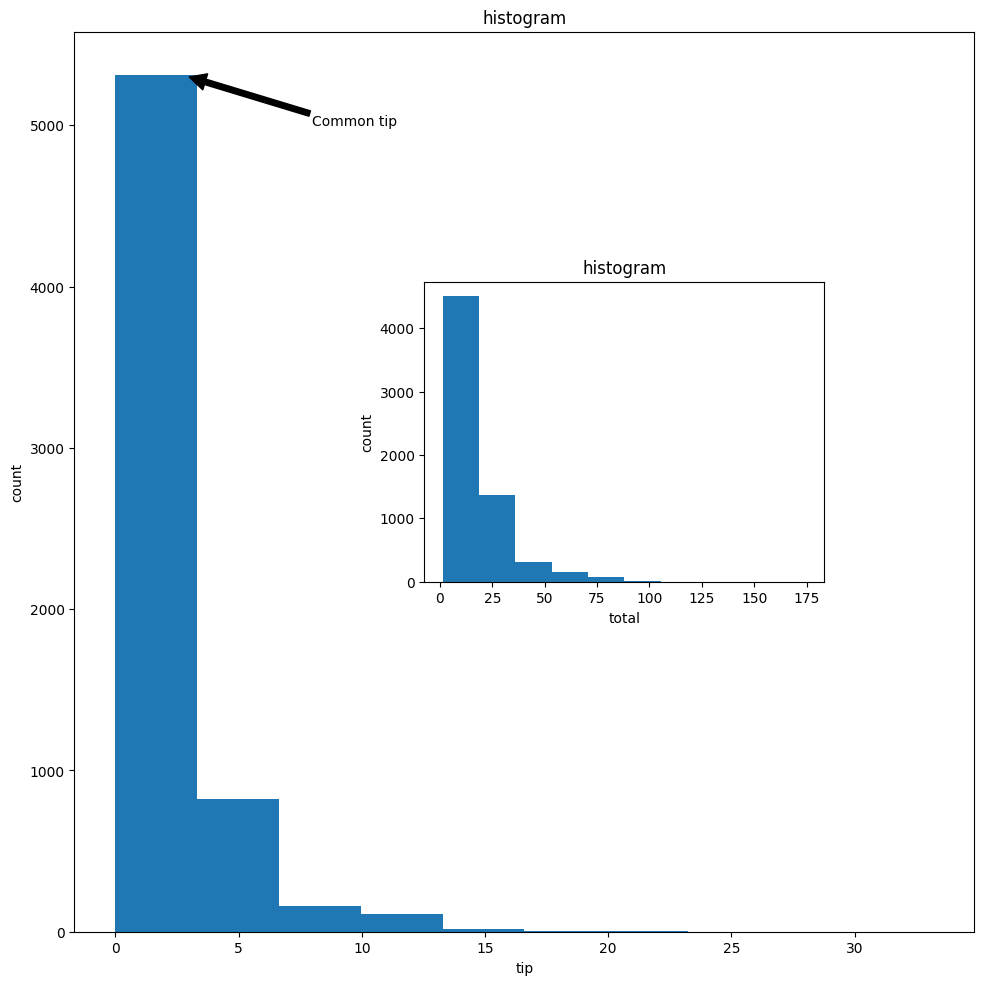

In [21]:
fig_1 = plt.figure(figsize=(10,10),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])

axes_1.set_xlabel('tip')
axes_1.set_ylabel('count')
axes_1.set_title('histogram')
axes_1.hist(df.tip);

# You can create axis inside of others
axes_2 = fig_1.add_axes([0.45,0.45,0.4,0.3])
axes_2.set_xlabel('total')
axes_2.set_ylabel('count')
axes_2.set_title('histogram')
axes_2.hist(df.total);
axes_1.annotate('Common tip', xy=(3, 5300), xytext=(8, 5000),
             arrowprops=dict(facecolor='black', shrink=-5),)